In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as sct

In [2]:
#scipyのポアソン分布の公式ドキュメントは以下のURL
#https://docs.scipy.org/doc/scipy-0.19.0/reference/generated/scipy.stats.poisson.html

### CSVファイルの読み込み

In [3]:
#CSVファイルの読み込み
data= pd.read_csv("SoftwareDevelopment/JupyterLab/緑本/chap2/chap2_data.csv")
print(data)

    Unnamed: 0  x
0            1  2
1            2  2
2            3  4
3            4  6
4            5  4
5            6  5
6            7  2
7            8  3
8            9  1
9           10  2
10          11  0
11          12  4
12          13  3
13          14  3
14          15  3
15          16  3
16          17  4
17          18  2
18          19  7
19          20  2
20          21  4
21          22  3
22          23  3
23          24  3
24          25  4
25          26  3
26          27  7
27          28  5
28          29  3
29          30  1
30          31  7
31          32  6
32          33  4
33          34  6
34          35  5
35          36  2
36          37  4
37          38  7
38          39  2
39          40  2
40          41  6
41          42  2
42          43  4
43          44  5
44          45  4
45          46  5
46          47  1
47          48  3
48          49  2
49          50  3


### データの要約

In [4]:
#データの個数
len(data)

50

In [5]:
#データの標本分散
data.var(ddof=0)

Unnamed: 0    208.2500
x               2.9264
dtype: float64

In [6]:
#データの不偏分散
data.var(ddof=1)

Unnamed: 0    212.500000
x               2.986122
dtype: float64

In [7]:
#データの要約
data.describe()

,Unnamed: 0,x
count,50.00000,50.00000
mean,25.50000,3.56000
std,14.57738,1.72804
min,1.00000,0.00000
25%,13.25000,2.00000
50%,25.50000,3.00000
75%,37.75000,4.75000
max,50.00000,7.00000


#### 注意
* stdは標準偏差のこと
* 標準偏差は分散の平方根
* 標本分散は標本集団の分散
* 不偏分散は母集団の分散
* 前者の期待値は母集団の分散と一致しないが後者は一致する

### ヒストグラム表示

(array([ 1.,  3., 11., 12., 10.,  5.,  4.,  4.]),
 array([-0.5,  0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5]),
 <a list of 8 Patch objects>)

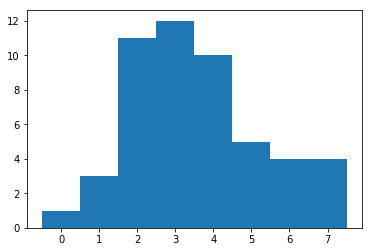

In [8]:
#ヒストグラム表示
plt.hist(data['x'],bins=np.arange(-0.5,8.5,1))

#### 注意
* data['x']にしないと正しく表示がされない

### ポアソン分布

In [9]:
#0~10の区間に対して平均3.56のポアソン分布を作成
x = range(10)
y = sct.poisson.pmf(x, mu=3.56)
#値を表示
y

array([0.02843882, 0.10124222, 0.18021114, 0.21385056, 0.190327  ,
       0.13551282, 0.08040427, 0.04089132, 0.01819664, 0.00719778])

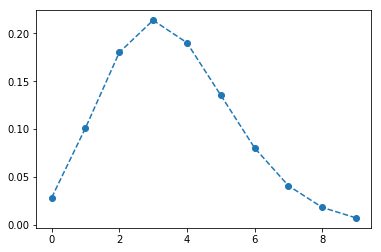

In [10]:
#ポアソン分布の可視化
plt.plot(x, y, "o--")

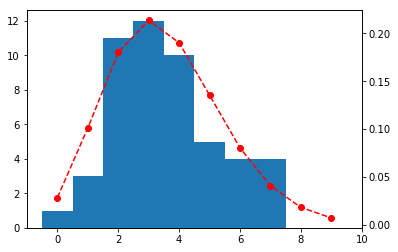

In [11]:
#ヒストグラムとポアソン分布を重ねて表示
fig, ax1=plt.subplots()
ax1.hist(data['x'], bins=[i-0.5 for i in range(11)])

ax2=ax1.twinx()
ax2.plot(x, y, "ro--")

plt.show()

### 最尤推定

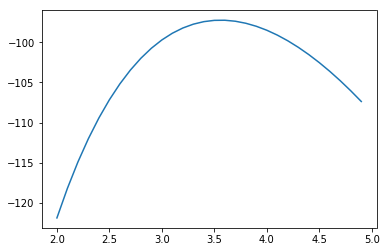

In [12]:
#推定対象パラメータmuの範囲は2から5まで0.1刻みとした
x = np.arange(2, 5, 0.1)

#stats.poisson.logpmf(): 対数尤度関数
#対数尤度関数は第1引数にデータを、第2引数にmuを取る
#ここではmuを引数にとる対数尤度関数をラムダ式で定義している
logL_func = lambda mu: sum(sct.poisson.logpmf(data['x'], mu))

#上で定義したラムダ式にmuの値を0.1刻みで代入して尤度を計算する
y = [logL_func(mu) for mu in x]

#可視化
plt.plot(x, y)

##### 注意
* sct.poisson.logpmfの仕様
* https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.poisson.html

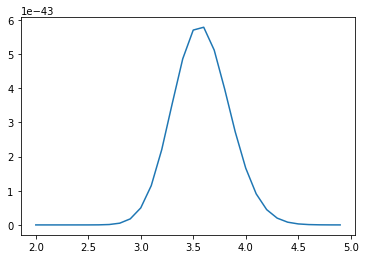

In [13]:
#対数尤度関数ではなく尤度関数の可視化
y = [np.exp(logL_func(mu)) for mu in x]

#可視化するとピークの位置は同じことがわかる
plt.plot(x, y)

In [14]:
#muの最大値
max_index = np.argmax(y)
x[max_index]

#データの平均値3.56とほぼ一致する

3.6000000000000014

### 最尤推定値のばらつき

3.88


(array([ 2.,  2.,  8.,  9., 12.,  6.,  7.,  3.]),
 array([-0.5,  0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5]),
 <a list of 8 Patch objects>)

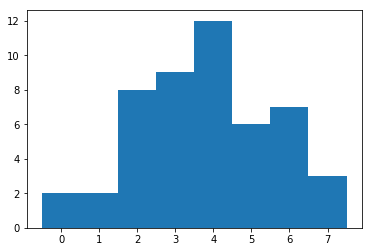

In [15]:
#ポアソン分布に従う乱数をポアソン乱数と呼ぶ
#平均3.56のポアソン分布のポアソン乱数を50個生成する
r = sct.poisson.rvs(3.56, size=50)

#平均値はmuと一致するとは限らない
print(r.mean())

#生成されたポアソン乱数の平均値のヒストグラム表示
#毎回結果が異なることに注意
plt.hist(r, bins=np.arange(-0.5,8.5,1))

#### 注意
* ポアソン分布とポアソン乱数の違いを意識すること
* 前者は確率分布であるが後者は離散値となる

3.57975


(array([ 568., 2043., 3488., 4295., 3779., 2701., 1692.,  860.]),
 array([-0.5,  0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5]),
 <a list of 8 Patch objects>)

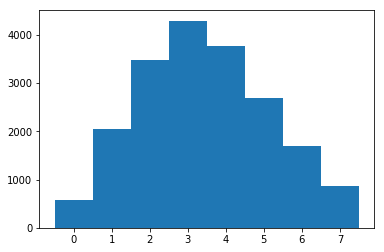

In [16]:
#ポアソン分布に従う乱数をポアソン乱数と呼ぶ
#平均3.56のポアソン分布のポアソン乱数を20000個生成する
r = sct.poisson.rvs(3.56, size=20000)

#50->5000にサンプル数を増加させると平均値はmuに近づく
print(r.mean())

#生成されたポアソン乱数の平均値のヒストグラム表示
#毎回結果が異なることに注意
plt.hist(r, bins=np.arange(-0.5,8.5,1))